net_p {'gpu_id': 3, 'net_name': 'composition', 'net_list': [{'net_name': 'TF', 'sizes': [10, 10], 'dim_cor': [10, 10], 'mode': 'tucker'}, {'net_name': 'SIREN', 'dim_in': 1, 'w0_initial': 30, 'dim_hidden': 100, 'dim_out': 1, 'num_layers': 4, 'w0': 1, 'use_bias': True}]}
reg_p {}
data_p {'data_shape': (10, 10), 'random_rate': 0.5, 'pre_full': True, 'mask_type': 'random', 'data_path': None, 'data_type': 'syn', 'down_sample': [1, 1, 1], 'mask_path': None, 'mask_shape': 'same', 'seeds': 88, 'down_sample_rate': 2, 'noise_mode': None, 'noise_parameter': 0.0, 'x_mode': 'inr', 'batch_size': 128, 'shuffle_if': False, 'xrange': 1, 'ymode': 'completion', 'return_data_type': 'tensor', 'out_dim_one': True}
opt_p {'net': {'opt_name': 'Adam', 'lr': 0.0001, 'weight_decay': 0}, 'reg': {'opt_name': 'Adam', 'lr': 0.0001, 'weight_decay': 0}}
train_p {'train_epoch': 10, 'task_name': 'completion', 'loss_fn': 'mse'}
show_p {'show_type': 'red_img', 'show_content': 'original'}
save_p {}


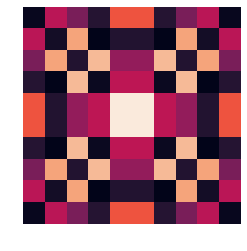

loss on test set 0.41813477873802185


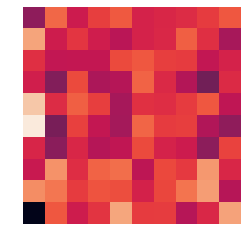

loss on test set 0.4102281630039215


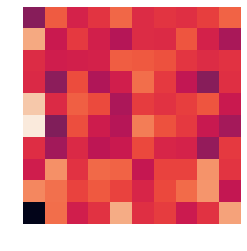

loss on test set 0.4073414206504822


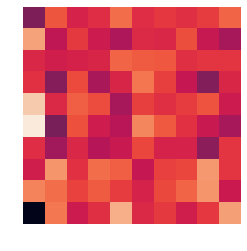

loss on test set 0.38161036372184753


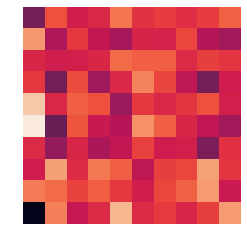

loss on test set 0.3748427629470825


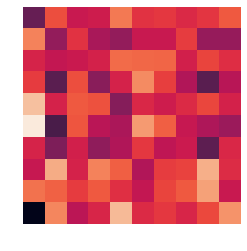

loss on test set 0.36874595284461975


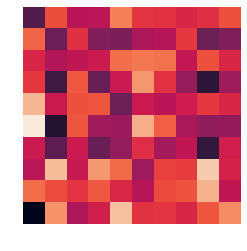

loss on test set 0.361725777387619


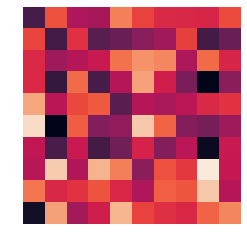

loss on test set 0.3599744141101837


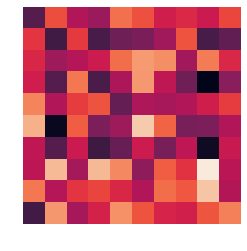

loss on test set 0.365255206823349


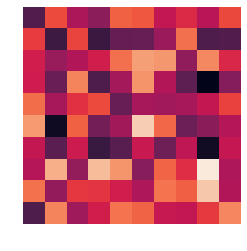

loss on test set 0.37288567423820496


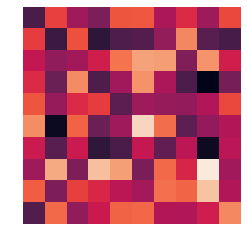

In [1]:
import rss

parameters = {}
net_list = []
# net_list.append({'net_name':'DMF','sizes':[10,10,10]})
net_list.append({'net_name':'TF','sizes':[10,10],'dim_cor':[10,10]})
net_list.append({'net_name':"SIREN",'dim_in':1,'w0_initial':30})
# net_list.append({'net_name':"SIREN",'dim_in':2,'w0_initial':100})
parameters['net_p'] = {'gpu_id':3,'net_name':'composition','net_list':net_list}
parameters['data_p'] = {'data_shape':(10,10),'random_rate':0.5,
                        'pre_full':True,'mask_type':'random'}
parameters['train_p'] = {'train_epoch':10}
parameters['show_p'] = {'show_type':'red_img','show_content':'original'}
rssnet = rss.rssnet(parameters)
rss.toolbox.save_json('./json/main_para.json',rssnet.parameter_all)

rssnet.show()
rssnet.show_p['show_content'] = 'recovered'
for i in range(10):
    rssnet.train()
    rssnet.show()

In [12]:
rssnet.net.net_list[1]

SirenNet(
  (layers): ModuleList(
    (0): Siren(
      (activation): Sine()
    )
    (1): Siren(
      (activation): Sine()
    )
    (2): Siren(
      (activation): Sine()
    )
    (3): Siren(
      (activation): Sine()
    )
  )
  (last_layer): Siren(
    (activation): Identity()
  )
)

In [10]:
import torch as t
import numpy as np


a = t.tensor([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])

(b==1).shape
a.shape
a[b==1]



tensor([], dtype=torch.int64)

In [4]:
for data in rssnet.data_train['train_loader']:
    print(data[1].shape)

torch.Size([65536])


In [5]:
import rss
parameters = rss.toolbox.load_json('./json/main_para.json')
print(parameters)

{'data_p': {'batch_size': 65536}}
